# **Esercitazione 4**
## Local Search


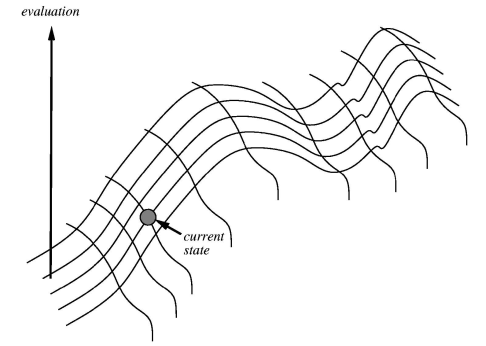

## Algoritmi di Local Search
* ### Hill-Climbing
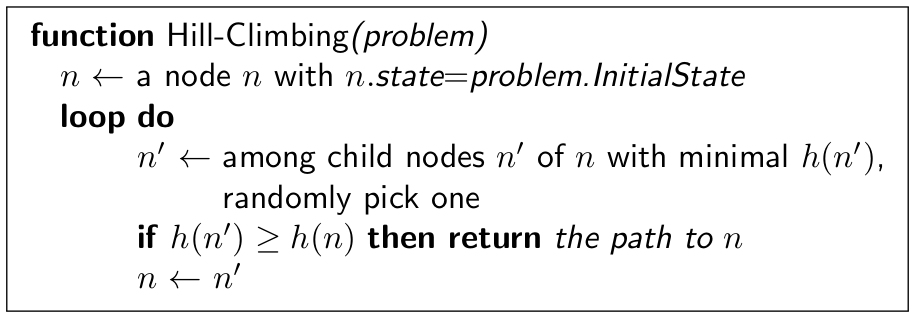
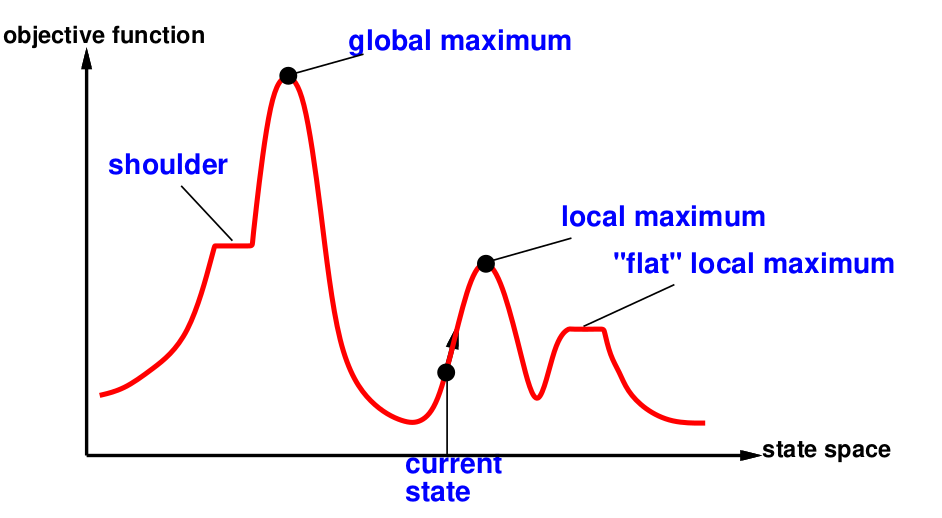
* ### Simulated Annealing
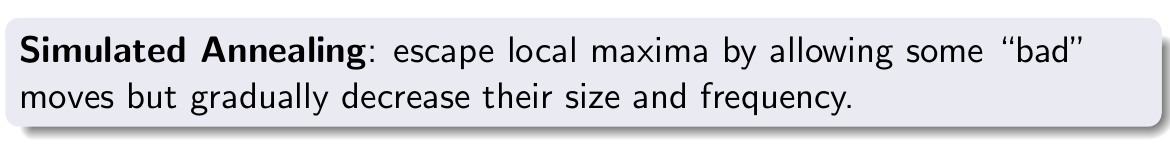
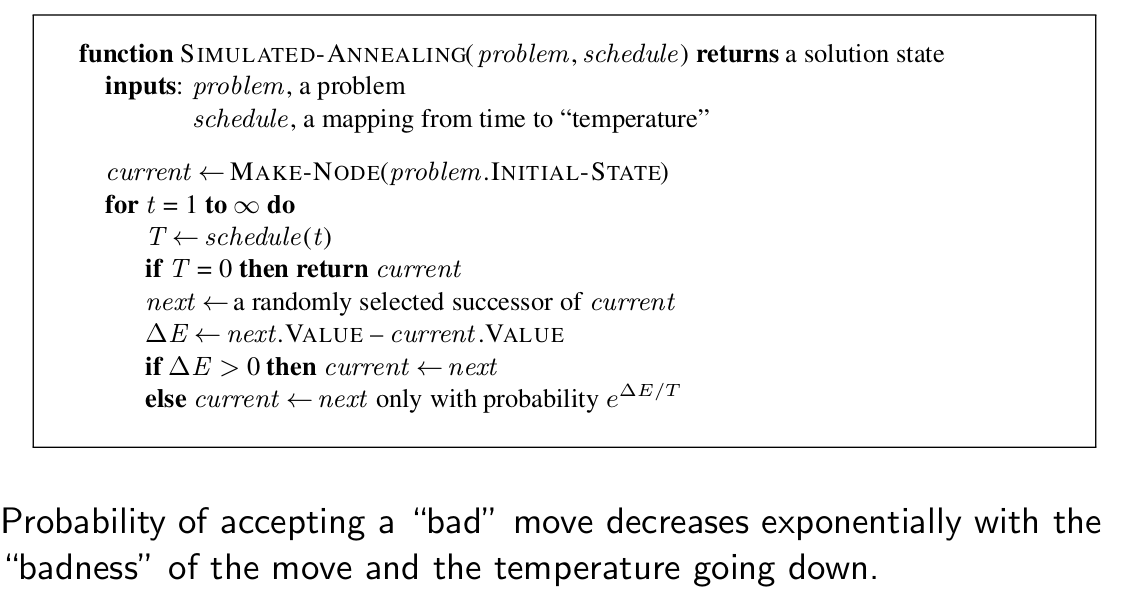
* ### Local Beam Search
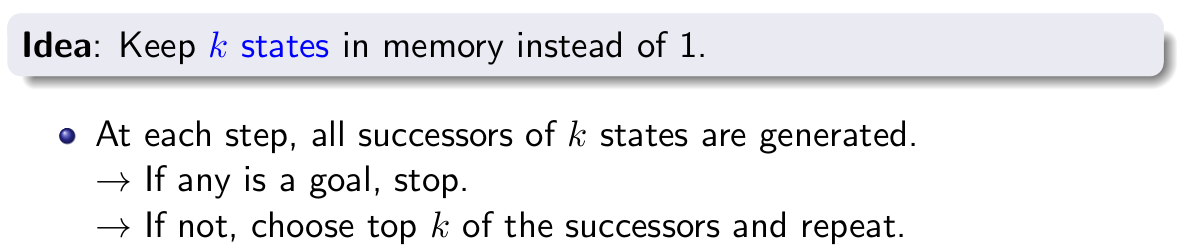


## Genetic Algorithms

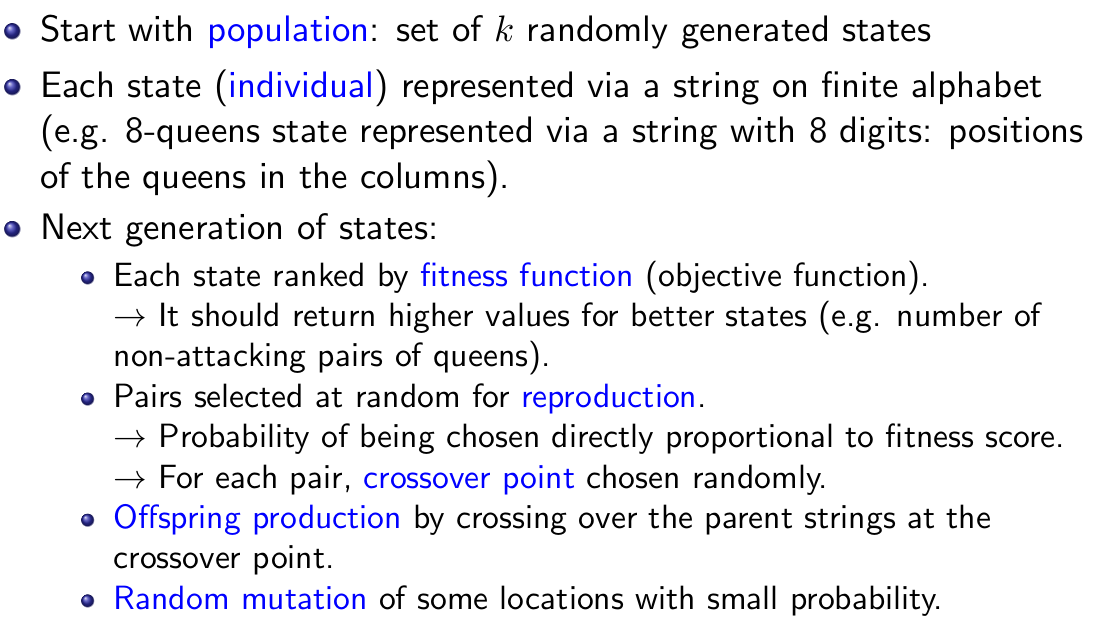

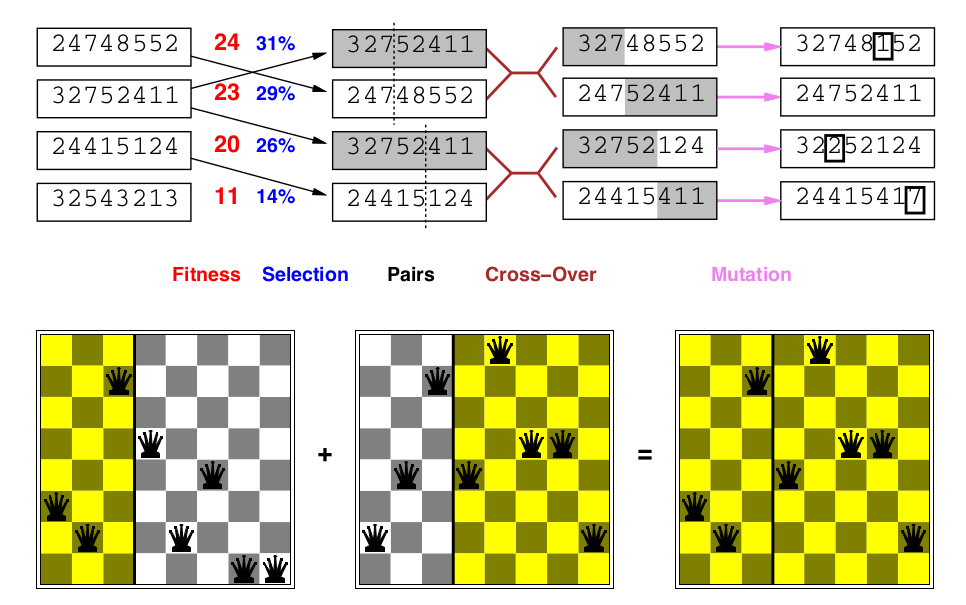

## Setup: N-Queens
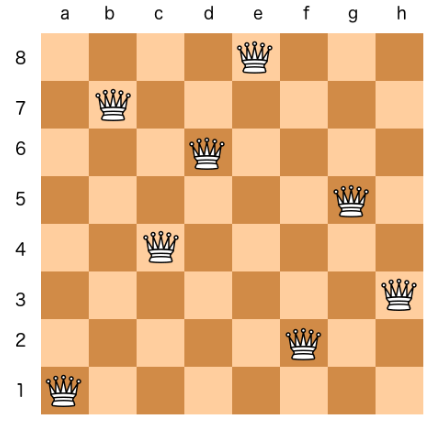
### Data una scacchiera NxN, posizionare N regine sulla scacchiera in maniera che nessuna coppia di regine possa attaccarsi, i.e.:
* ### occupi la stessa riga
* ### occupi la stessa colonna
* ### sia sulla stessa diagonale

## Esercizio 1:
### Completare l’implementazione di un algoritmo genetico per risolvere N-queens. La struttura dell’algoritmo è già presente, e vanno solo completate le fasi di:
* ### selezione stocastica dei genitori
* ### generazione dei figli tramite crossover
* ### mutazione dei figli

## Rappresentazione degli individui

### Ogni individuo è rappresentato come una lista di lunghezza N, contenente interi (geni) nell’intervallo
### [0, …, N-1]. Dato un individuo x, ogni gene x[i] rappresenta una regina posizionata alla riga x[i] e alla colonna i.

### Nota: gli indici di righe e colonne partono da 0.

## Es: x = [0, 6, 3, 5, 7, 1, 4, 2]
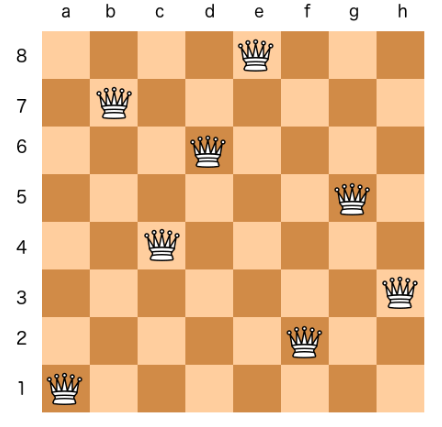

## Selezione stocastica dei genitori
### Implementare la funzione di fitness f(x) che ritorni, per l’individuo x, il numero di coppie di regine distinte che non possono attaccarsi.
### Nota: le coppie (p, q) e (q, p) non sono distinte, e vanno quindi contate una volta sola.

### Implementare selezione dei genitori con strategia roulette wheel: ogni genitore viene estratto dalla popolazione con probabilità proporzionale alla sua fitness.

In [ ]:
import random

def fitness_fn(individual):
    """Implementare la funzione di fitness.

    Dato un individuo, ritornare il valore di fitness corrispondente
    """
    pass

def roulette_wheel_selection(population, fitnesses, k):
    """Implementare la fase di selezione dei genitori.

    Dati:
    - population: lista di individui
    - fitnesses: lista dei valori di fitness per ogni individuo
    - k: numero di parent da selezionare
    ritornare una lista di k individui, estratti a caso dalla
    popolazione con probabilità proporzionale al loro valore di fitness.
    """
    pass

## Crossover
### Implementare l’operatore di crossover: dati due genitori x ed y:
* ### estrarre un punto di crossover c tra 0 e N-1
* ### generare il primo figlio come:
    ### [x[0], …, x[c], y[c+1], …, y[N]]
* ### generare il secondo figlio come:
    ### [y[0], …, y[c], x[c+1], …, x[N]]

In [ ]:
def crossover(p, q):
    """Implementare la fase di crossover.

    Dati due individui genitori p, q, ritornare una *nuova* coppia di
    individui figli che siano il risultato del crossover tra p e q
    """
    pass

## Mutation
### Implementare l’operatore di mutazione: dato un individuo x e il mutation rate r, ritornare:
* ### con probabilità r, la versione mutata di x
* ### con probabilità (1-r), una copia di x
### Per mutare x, estrarre l’indice di un singolo gene da modificare ed estrarre un nuovo valore per quel gene.

In [ ]:
def mutation(individual, rate):
    """Implementare la fase di mutazione.

    Dato un individuo e la probabilità di mutazione, ritornare *una
    copia* dell'individuo con applicata l'eventuale mutazione (i.e. un
    singolo gene ri-estratto tra i valori possibili). Si
    ricorda che, in python, data una lista l se ne può ottenere una
    copia con l.copy().
    """
    pass

## Verifichiamo l'esercizio

In [ ]:
import math

def random_individual(n):
    return [random.randrange(n) for _ in range(n)]

def genetic_algorithm_step(
    population,
    fitnesses,
    mutation_rate,
):
    parents = roulette_wheel_selection(population, fitnesses, k=len(population))
    offspring = []
    for x, y in zip(parents[::2], parents[1::2]):
        offspring += crossover(x, y)
    offspring = [mutation(x, rate=mutation_rate) for x in offspring]
    offspring_fitnesses = [fitness_fn(x) for x in offspring]
    population, fitnesses = offspring, offspring_fitnesses
    return population, fitnesses

def run_ga_n_queens(
    n,
    population,
    mutation_rate,
    steps,
    verbose=False
):
    target_fitness = int(n*(n-1)/2)
    ga_params = dict(
        mutation_rate=mutation_rate,
    )
    fitnesses = [fitness_fn(x) for x in population]
    solved = False
    if verbose:
        print(f'[0] Champion fitness: {max(fitnesses)}; population fitness (mean +- std): {mean(fitnesses)} +- {std(fitnesses)}')
    for i in range(steps):
        population, fitnesses = genetic_algorithm_step(population, fitnesses, **ga_params)
        if verbose:
            print(f'[{i+1}] Champion fitness: {max(fitnesses)}; population fitness (mean +- std): {mean(fitnesses)} +- {std(fitnesses)}')
        if max(fitnesses) == target_fitness:
            if verbose:
                print(f'Solution found at generation {i+1}.')
            solved = True
            break
    else:
        if verbose:
            print(f'Solution not found in the given number of generations.')
    i_champ = argmax(fitnesses)
    champion = population[i_champ]
    if verbose:
        print(f'Champion individual (fitness: {fitnesses[i_champ]}):')
        print_board(champion)
    return solved

def argmax(v):
    i_m, m = None, None
    for i, vi in enumerate(v):
        if i_m is None or vi > m:
            m = vi
            i_m = i
    return i_m

def mean(v):
    return sum(v) / len(v)

def std(v):
    mu = mean(v)
    return math.sqrt(sum([(x - mu)**2 for x in v]) / len(v))

def print_board(individual):
    print(f'Board resulting from {individual}')
    n = len(individual)
    board = [["-" for _ in range(n)] for _ in range(n)]
    for j, i in enumerate(individual):
        board[i][j] = "Q"
    for i in range(n):
        for j in range(n):
            k = board[i][j]
            print(f'{k} ', end="")
        print()

In [ ]:
random.seed(12345)
pop_size = 50
population = [random_individual(n=6) for _ in range(pop_size)]
params = dict(
    mutation_rate=0.5,
)

print(f'Esercizio 1:')
print(f'------------')
run_ga_n_queens(
    n=6,
    population=population,
    **params,
    steps=500,
    verbose=True
)